# Introduction To Data Science – Assignment 2

---

#### Sections A – B – C – D

---

##***Instructions: Read These Carefully Before Starting!***

1. Due Date: Thursday 20th October 2022 – 11:59PM

2. **Name the file in the format Lyyxxxx_A2.ipynb and save it as .ipynb (e.g. L216666_A2.ipynb)**

3. Submission will be taken on Google Classroom (**submit SINGLE .ipynb file ONLY**)

4. **Assignment will not be evaluated if**:

> * You submit python (.py) files
> * You submit multiple .ipynb files
> * You submit compressed (.rar or .zip) files

5. **Work in the spaces provided and do not delete/modify any cells from this template.**

6. Upload data files directly to Google Colab - do not use Google Drive or GitHub linking method

*Not following these instructions will lead to mark deduction.*

---

All source files needed to complete this assignment can be found on the following [Google Drive link](https://drive.google.com/drive/folders/1qBib_6ZOhvHb73ZRLWiCMWl9NFyU1IDO?usp=sharing). Download these files and upload them to your Google Colab Notebook. 

**Do not link Google Drive or GitHub with Colab.**

**Do not add these files with your submission on Google Classroom.**

---

Happy Coding 🌺

---

TA Emails

Section A, C - Muhammad Maarij l192347@lhr.nu.edu.pk

Section B, D - Hira Ijaz l192377@lhr.nu.edu.pk

---

---
## Question 0

Add all library imports here

In [26]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

---
## Question 1

####Single Linear Regression with Gradient Descent

> Take help from slides 26 and 30
---

**Part A -**
Write a function that calculates and returns value for hypothesis $h_\theta(x)$

In [27]:
# complete this function implementation
#hyp=0o+01.x
def hypothesis(x, theta):
  hypothesiss= theta[0]+theta[1]*x
  return hypothesiss

**Part B -**
Write a function that calculates and returns value for loss/cost $J(\theta_0, \theta_1)$

In [28]:
def loss(hypothesis_x, y):
  m = len(hypothesis_x)
  return  sum([(hypothesis_x[i] - y[i])**2 for i in range(m)]) * (2 / m)

**Part C-**
Write a function that applies the gradient descent algorithm and updates values of $\theta_0$ and $\theta_1$ until they converge.

* take default vaue of $α$ to be 0.015
* take default number of iterations to be 15000
* print loss after every 500 iterations

In [29]:
# complete this function implementation
def gradientdescent(x, y, theta, num_iterations=15000, alpha=0.015):
    m = x.size
    for j in range(num_iterations):
        h = []
        for num in x:
            h.append(hypothesis(num, theta))
        derivative_0 = sum([(hypothesis(x[i], theta) - y[i]) for i in range(m)])
        derivative_1 = sum([(hypothesis(x[i], theta) - y[i])*x[i] for i in range(m)])
        theta[0] = theta[0] - alpha * (1 / m) * derivative_0
        theta[1] = theta[1] - alpha * (1 / m) * derivative_1
        # report
        if j % 500 == 0:

            print('loss:', loss(h, y))

**Part D -**
FactoryRevenue.csv contains information about the number of workers in a factory and the annual profit for that factory. Import the file FactoryRevenue.csv as a Pandas DataSet and print out the information for it.

In [30]:
import pandas as pd
factory=pd.read_csv("/content/Update_FactoryRevenue.csv")
factory

,TotalFactoryWorkers,AnnualProfit
0,6.5894,5.9966
1,9.2482,12.1340
2,5.8918,1.8495
3,8.2111,6.5426
4,7.9334,4.5623
...,...,...
94,5.5416,1.0179
95,7.5402,6.7504
96,5.3077,1.8396
97,7.4239,4.2885


**Part E -**
Remove rows that have any null values

In [31]:
"""print(factory)
print("Number of Rows Before: ",factory.shape[0])
print("Number of rows containing null data:",factory.isnull().sum().sum())
factory.dropna(axis=0, inplace=True)
print("Number of rows containing null data after removal:",factory.isnull().sum().sum())
print("Number of Rows After: ",factory.shape[0])"""
print("\nNumber of rows: ", factory.shape[0])
data = factory.dropna()
data.info()


Number of rows:  99
<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 98
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TotalFactoryWorkers  97 non-null     float64
 1   AnnualProfit         97 non-null     float64
dtypes: float64(2)
memory usage: 2.3 KB


**Part F -**

First identify the independant and dependant variables. 

Then create two arrays named x and y and add independant variable data to array x, dependant variable data to array y.

In [36]:
# independant variable:TOTAL FACTORY WORKERS
# dependant variable:ANNUAL PROFIT
"""print("\n")
print("Independent Variable")
factory=factory[["TotalFactoryWorkers"]]
print(factory.head)
print("\n")
factoryy=pd.read_csv("/content/FactoryRevenue.csv")
print("Dependent Variable")
factoryy=factoryy[["AnnualProfit"]]
print(factoryy.head)"""
# independant variable: TotalFactoryWorkers
# dependant variable: AnnualProfit
x =  factory["TotalFactoryWorkers"].to_numpy()
print(x)
y =  factory["AnnualProfit"].to_numpy()
print(y)


[ 6.5894  9.2482  5.8918  8.2111  7.9334  8.0959  5.6063 12.836   6.3534
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   6.1101
  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862  5.0546
  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301  6.4296
  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828  10.957
 13.176  22.203   5.2524  9.1802  6.002   5.5204  5.0594  5.7077  7.6366
  5.8707     nan  5.3054  8.2934 13.394   5.4369  7.3345  6.0062  7.2259
  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292  5.1884  6.3557
  9.7687  6.5159  8.5172  5.4069  6.8825 11.708   5.7737  7.8247  7.0931
  1.2546  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031]
[ 5.9966  12.134    1.8495   6.5426   4.5623   4.1164   3.3928  10.117
  5.4974   1.4233  -1.4211   2.4756   4.6042   3.9624   5.4141   5.1694
 -0.74279 17.929   12.054   17.054    4.8852   5.7442  

**Part G -** 

Create an array called 'theta' that will hold $θ_0$ and $θ_1$. Initalize both values to 0.

Then call the gradientDescent function using array x, array y, and array theta. Do not provide any other input parameters.

Print out the values of y-intercept and slope/gradient

In [37]:
theta = [0,0]
gradientdescent(x, y, theta)
print("Y-intercept:",theta[0])
print("Slope:",theta[1])

loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
Y-intercept: nan
Slope: nan


**Part H -** Plot a scatter plot and regression line on the same graph

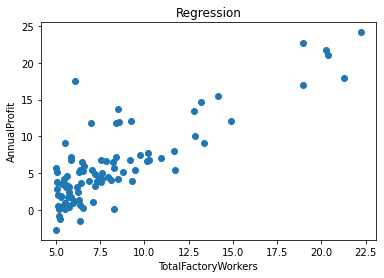

In [38]:
"""import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import io
plt.scatter(factory["TotalFactoryWorkers"], factory["AnnualProfit"])
plt.plot(x, theta[0] + theta[1]*x, color='red')
plt.title("Regression")
plt.xlabel("TotalFactoryWorkers")
plt.ylabel("AnnualProfit")
plt.show()"""
plt.scatter(factory["TotalFactoryWorkers"], factory["AnnualProfit"])
plt.plot(x, theta[0] + theta[1]*x, color='red')
plt.title("Regression")
plt.xlabel("TotalFactoryWorkers")
plt.ylabel("AnnualProfit")
plt.show()


---
## Question 2

Logistic Regression on Flowers Dataset

---



**Part A** - Load the file FlowersData.csv and describe the dataset

In [5]:
import pandas as pd
flower=pd.read_csv("/content/FlowersData.csv")
flower

,sepal_length,sepal_width,petal_length,petal_width,flower_name
0,5.1,3.5,1.4,0.2,hibiscus
1,4.9,3.0,1.4,0.2,hibiscus
2,4.7,3.2,1.3,0.2,hibiscus
3,4.6,3.1,1.5,0.2,hibiscus
4,5.0,3.6,1.4,0.2,hibiscus
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,lily
146,6.3,2.5,5.0,1.9,lily
147,6.5,3.0,5.2,2.0,lily
148,6.2,3.4,5.4,2.3,lily


**Part B** - Split data into training and test data using SKLearn train_test_split. Specify parameter test_size to be 25%

Hint: You will be needing 4 arrays: X_train, X_test, y_train, y_test

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

flower=pd.read_csv("/content/FlowersData.csv")
flower["flower_name"].unique()
flower["flower_name"]=flower["flower_name"].replace({'hibiscus':1,'daffodil':2,'lily':3})
X_train, X_test, y_train, y_test = train_test_split(flower[['sepal_length','sepal_width','petal_length','petal_width']],flower['flower_name'], test_size=0.25)
X_train


,sepal_length,sepal_width,petal_length,petal_width
120,6.9,3.2,5.7,2.3
80,5.5,2.4,3.8,1.1
64,5.6,2.9,3.6,1.3
115,6.4,3.2,5.3,2.3
6,4.6,3.4,1.4,0.3
...,...,...,...,...
113,5.7,2.5,5.0,2.0
78,6.0,2.9,4.5,1.5
49,5.0,3.3,1.4,0.2
144,6.7,3.3,5.7,2.5


**Part C** - Perform scaling on the X_test and X_train values using StandardScacler from SKLearn Library

In [ ]:
from sklearn import linear_model
mymodel = linear_model.LogisticRegression(max_iter=112)
mymodel.fit(X_train,y_train)

LogisticRegression(max_iter=112)

**Part D** - Train Model using SKLearn LogisticRegression

In [ ]:
mymodel.predict(X_test)
X_test
#mymodel.predict(X_test)


,sepal_length,sepal_width,petal_length,petal_width
30,4.8,3.1,1.6,0.2
46,5.1,3.8,1.6,0.2
88,5.6,3.0,4.1,1.3
83,6.0,2.7,5.1,1.6
57,4.9,2.4,3.3,1.0
148,6.2,3.4,5.4,2.3
20,5.4,3.4,1.7,0.2
143,6.8,3.2,5.9,2.3
9,4.9,3.1,1.5,0.1
108,6.7,2.5,5.8,1.8


**Part E** - Predict Labels for test split

In [ ]:
predicted_output=mymodel.predict(X_test)
predicted_output

array([1, 1, 2, 3, 2, 3, 1, 3, 1, 3, 2, 3, 3, 2, 1, 1, 1, 3, 1, 1, 2, 2,
       1, 1, 1, 2, 1, 1, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2])

---
## Question 3

Confusion Matrix Construction

---

**Part A** - Using the prediction result of logistic regression (Question 2) construct a confusion matrix using SKLearn confusion_matrix

Print out this confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrixx=confusion_matrix(y_test,predicted_output)
confusion_matrixx

array([[14,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 10]])

**Part B** - Calculate and print Accuracy

In [ ]:
#TP=CELL 1=14
TP=7
#TN=CELL 5+6+8+9
TN=13+1+0+10
#FN=CELL 4+6
FN=0+1
#FP=CELL 2+8
FP=0+0
Accuracy=(TP+TN)/(TP+TN+FN+FP)
print(Accuracy)
Acuuracy_in_percent=Accuracy*100
print(Acuuracy_in_percent)

0.96875
96.875


**Part C** - Calculate and print Recall

In [ ]:
Recall=(TP)/(TP+FN)
print(Recall)

0.875


**Part D** - Calculate and print Precision

In [ ]:
Precision=(TP)/(TP+FP)
print(Precision)

1.0


**Part E** - Calculate and print $𝐹_1$ Score

In [ ]:
Fscore=(2*Precision*Recall)/(Precision+Recall)
print(Fscore)

0.9333333333333333
